This data is from the 2020 CSV version of Lahman’s Baseball Database, to be downloaded [here](https://github.com/chadwickbureau/baseballdatabank/archive/master.zip).

In [51]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
data_dir = 'baseballdatabank-master/core/'
filepath = Path(data_dir + 'Batting.csv')

In [34]:
batting_df = pd.read_csv(filepath)

In [35]:
batting_df

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
for col in batting_df.columns:
    print(col, end=' ')

playerID yearID stint teamID lgID G AB R H 2B 3B HR RBI SB CS BB SO IBB HBP SH SF GIDP 

How many unique players had at least one at-bat?

In [41]:
len(batting_df.loc[batting_df.AB > 0].playerID.unique())

17593

In [80]:
# Find the number of rows in 2019
print(len(batting_df.loc[batting_df.yearID==2019]))
# Find the number of unique players in 2019
print(len(batting_df.loc[batting_df.yearID==2019].playerID.unique()))

1569
1410


These aren't equal because some players were traded during the season and therefore are given more than one row during that season.

In [98]:
batting_df.loc[(batting_df.yearID==2019) & (batting_df.playerID=='adamsau02')]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
105869,adamsau02,2019,1,WAS,NL,1,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
105870,adamsau02,2019,2,SEA,AL,29,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0


For example, `adamsau02` had two stints in 2019, one on the Nationals and one on the Mariners.

I'd like to make a dataframe for each year, where each player appears only once in each dataframe. To do this, I add the values for each player in his different stints in the season. This way I can get, say, the number of home runs hit by a given player in 2019 easily and compare this to the number he hit in a previous year. The string attributes (such as `teamID`) are automatically excluded, and I manually exclude `yearID` and `stint` since adding these values doesn't make sense.

In [129]:
year_dict = {}
for year in batting_df.yearID.unique():
    year_dict[year] = batting_df.loc[(batting_df.yearID==year)].groupby(['playerID']).sum().drop(columns=['yearID', 'stint'])

In [130]:
year_dict[2019][:10]

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,
abadfe01,21,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
abreubr01,7,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
abreujo02,159,634,85,180,38,1,33,123.0,2.0,2.0,36,152.0,4.0,13.0,0.0,10.0,24.0
acunaro01,156,626,127,175,22,2,41,101.0,37.0,9.0,76,188.0,4.0,9.0,0.0,1.0,8.0
adamecr01,10,22,1,7,1,0,0,2.0,0.0,0.0,2,8.0,0.0,0.0,0.0,0.0,0.0
adamewi01,152,531,69,135,25,1,20,52.0,4.0,2.0,46,153.0,1.0,3.0,3.0,1.0,9.0
adamja01,23,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
adamsau01,15,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
adamsau02,30,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0


We can see that now `adamsau02` only appears once in 2019 and played 30 games: 1 in the first stint and 29 in the second, as we can see from `batting_df`.

In [186]:
df = batting_df.loc[batting_df.yearID==1871]
print(len(df.teamID.unique()))
print(len(df.playerID.unique()))
print(len(df.loc[df.AB >= 100].playerID.unique()))

9
115
63


In 1871 there were 9 teams. There were 115 players total and 63 of them had at least 100 at-bats.

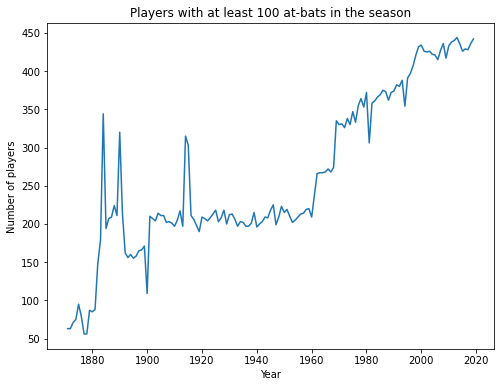

In [133]:
AB_cutoff = 100
years = range(1871, 2020)
num_players = []
for year in years:
    df = year_dict[year]
    num_players.append(len(df.loc[df.AB >= AB_cutoff]))

plt.figure(figsize=(8,6))
plt.plot(years, num_players)
plt.xlabel('Year')
plt.ylabel('Number of players')
plt.title(f'Players with at least {AB_cutoff} at-bats in the season')
plt.show()

I'm curious whether players generally hit more home runs now than they did in the past. How can I make this more precise?

Maybe a good measure is the fraction of players in a season who hit more than some number of home runs, say 10. I'd like to only include players who have more than some number of at-bats; I think 100 is a good cutoff here. As we can see in the above plot, today there are around 15 players per team who satisfy this (there are 30 teams in the MLB). This number wwas lower in the past because there were fewer teams and fewer games in the season, but still the number was substantial past 1920.

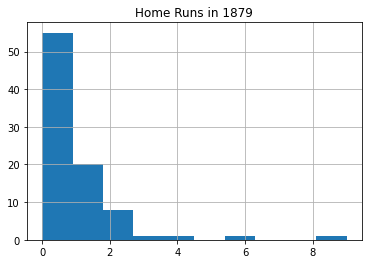

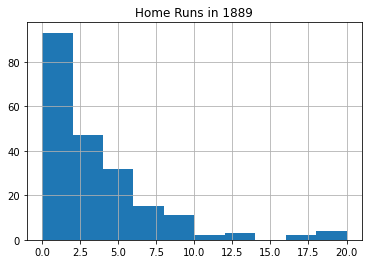

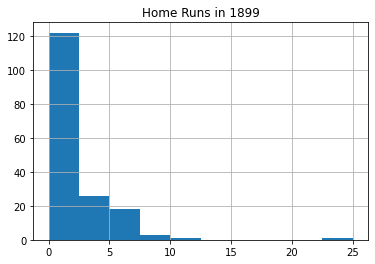

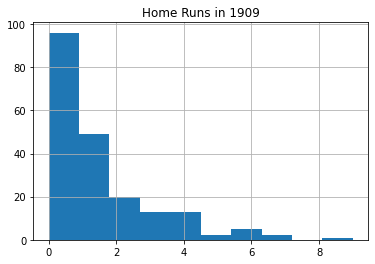

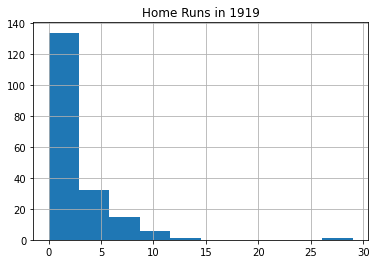

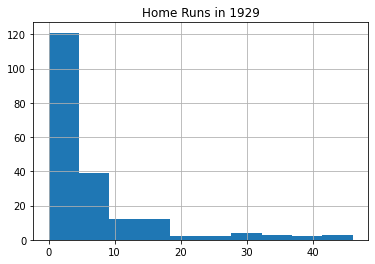

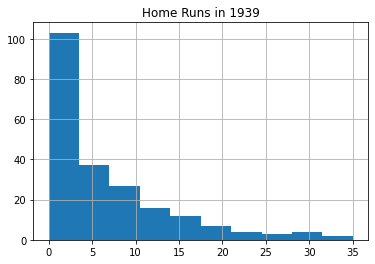

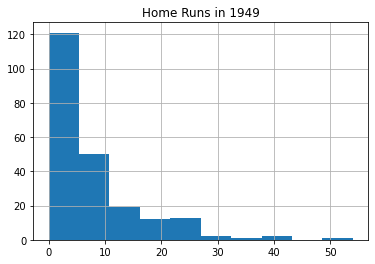

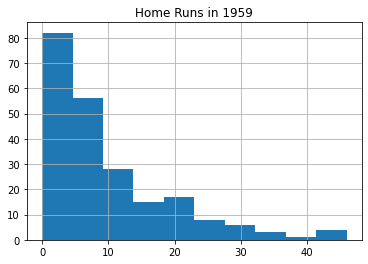

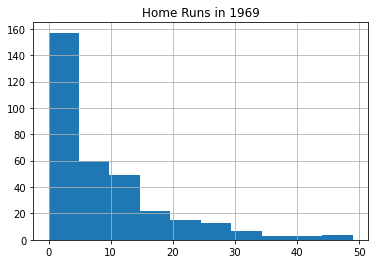

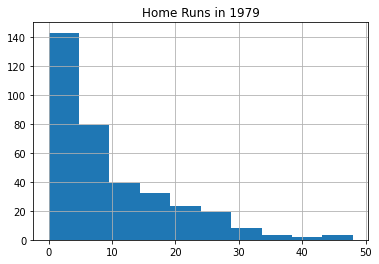

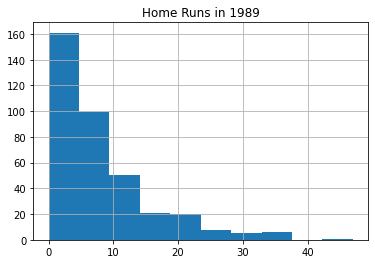

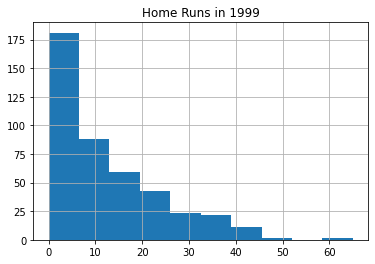

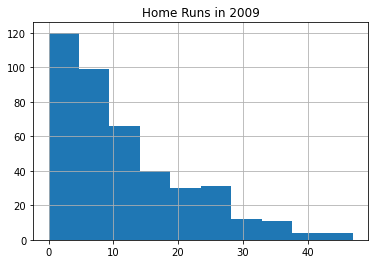

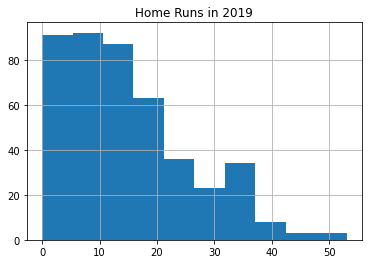

In [145]:
for year in [1879 + 10*i for i in range(15)]:
    df = year_dict[year]
    df.loc[df.AB > 100].hist(column='HR')
    plt.title(f'Home Runs in {year}')
    plt.show()

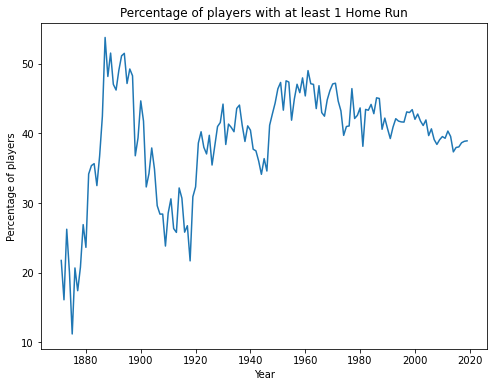

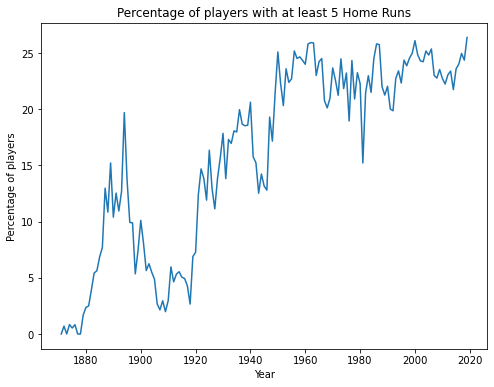

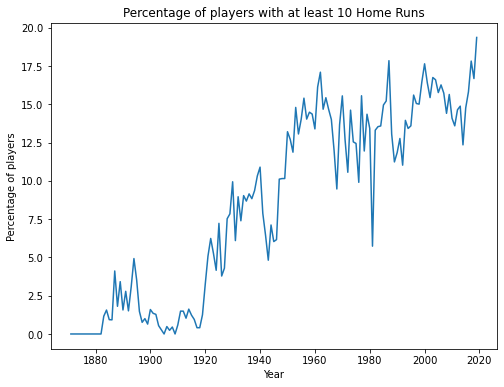

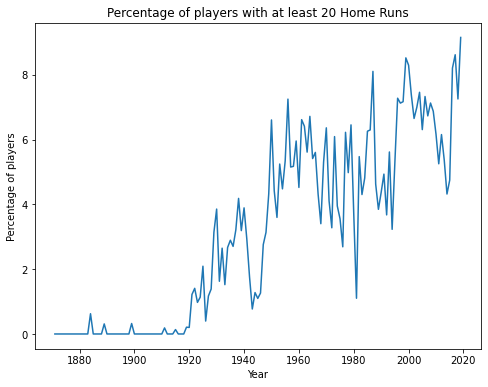

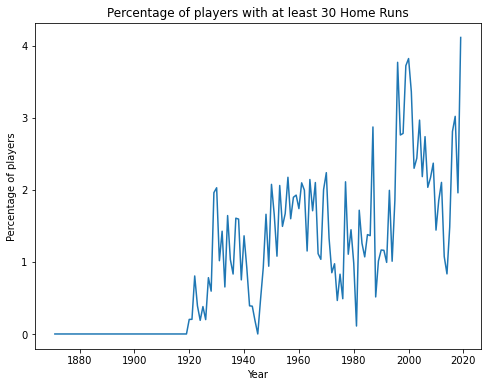

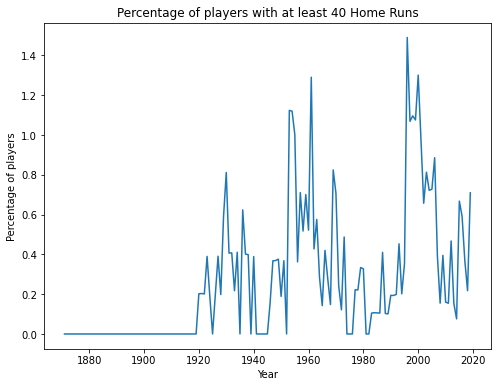

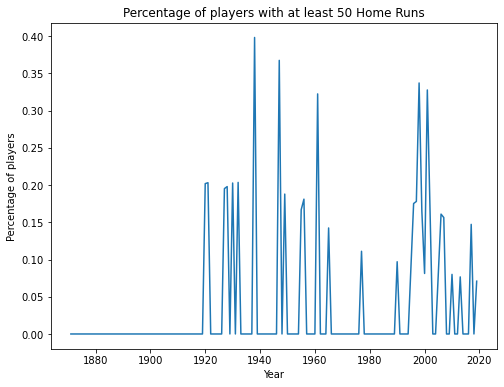

In [179]:
for cutoff in [1, 5, 10, 20, 30, 40, 50]:
    frac_players = []
    years = range(1871, 2020)
    for year in years:
        df = year_dict[year]
        num = len(df.loc[df.HR >= cutoff])
        frac_players.append(100*num/len(df))

    plt.figure(figsize=(8,6))
    plt.plot(years, frac_players)
    if cutoff == 1:
        plt.title(f'Percentage of players with at least {cutoff} Home Run')
    else:
        plt.title(f'Percentage of players with at least {cutoff} Home Runs')
    plt.xlabel('Year')
    plt.ylabel('Percentage of players')
    plt.show()

In [176]:
df = year_dict[1998]
df.loc[df.HR >= 50]

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,
griffke02,161,633,120,180,33,3,56,146.0,20.0,5.0,76,121.0,11.0,7.0,0.0,4.0,14.0
mcgwima01,155,509,130,152,21,0,70,147.0,1.0,0.0,162,155.0,28.0,6.0,0.0,4.0,8.0
sosasa01,159,643,134,198,20,0,66,158.0,18.0,9.0,73,171.0,14.0,1.0,0.0,5.0,20.0
vaughgr01,158,573,112,156,28,4,50,119.0,11.0,4.0,79,121.0,6.0,5.0,0.0,4.0,7.0
